In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sn
from sklearn.svm import SVC

In [2]:
#Load dataset and give headers
df = pd.read_csv('../data/covtype.data')
df.columns = [str(x) for x in range(0,55)] #name these columns using digits from the range 0-55
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
5,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
6,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
7,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
8,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5
9,2612,201,4,180,51,735,218,243,161,6222,...,0,0,0,0,0,0,0,0,0,5


In [3]:
def cm(y_test,y_pred):
    classes = ["1","2","3","4","5","6","7"] # put your class labels
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred,labels=range(7)), index = [i for i in classes],
                      columns = [i for i in classes])
    plt.figure(figsize = (10,7))
    plt.title('Confusion matrix')
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},fmt='d')
    
    
    plt.show()

def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

In [4]:
#split the dataset into train and test (train = first 15120 rows)
y_train = df.iloc[0:15120, df.shape[1]-1]
y_test = df.iloc[15120:, df.shape[1]-1]

X_train = df.iloc[0:15120, 0:df.shape[1]-1]
X_test = df.iloc[15120:, 0:df.shape[1]-1]

In [5]:
#scale/normalize features X_train[0,1] because the algorithms computes distance(eg LDA)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test= scaler.transform(X_test)

In [6]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=10) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 


Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.458, total=   8.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.659, total=   9.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.616, total=   9.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.551, total=   8.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.585, total=   8.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.615, total=   9.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.681, total=   9.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.626, total=   8.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.649, total=   9.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.473, total=   6.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.678, total=   6.7s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.642, total=   6.6s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.554, total=   6.4s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.622, total=   6.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.634, total=   6.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.714, total=   6.6s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.735, total=   5.4s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.771, total=   5.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.481, total=   6.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.665, total=   7.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.621, total=   6.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.546, total=   6.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.630, total=   6.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.716, total=   6.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.661, total=   5.8s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.701, total=   5.7s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.754, total=   5.8s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.479, total=   6.7s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.660, total=   7.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.622, total=   7.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.668, total=   6.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.679, total=   5.9s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.714, total=   6.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.673, total=   5.8s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.695, total=   6.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.752, total=   6.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.478, total=   7.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 44.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [7]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [9]:
#Run SVM with the best parameters after tuning
svm = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
svm.fit(X_train, y_train)
Y_pred = svm.predict(X_test)

In [10]:
# print classification report 
print(classification_report(y_test, Y_pred)) 

              precision    recall  f1-score   support

           1       0.72      0.75      0.74    209679
           2       0.83      0.67      0.74    281141
           3       0.80      0.80      0.80     33594
           4       0.23      0.97      0.37       587
           5       0.22      0.93      0.36      7333
           6       0.52      0.84      0.64     15207
           7       0.59      0.96      0.73     18350

    accuracy                           0.73    565891
   macro avg       0.56      0.85      0.63    565891
weighted avg       0.77      0.73      0.74    565891



In [11]:

svm_score = accuracy_score(y_test,Y_pred)
print("After grid search vross validation, accuracy: %f" %svm_score)

After grid search vross validation, accuracy: 0.725919


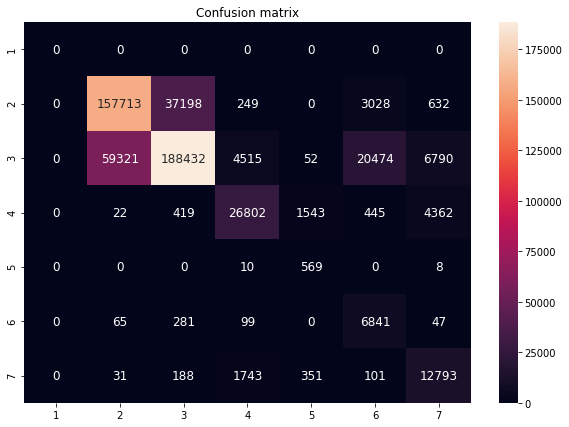

In [12]:
cm(y_test, Y_pred)

In [13]:
print(svm.support_vectors_ )

[[0.42094663 0.96388889 0.05769231 ... 0.         0.         0.        ]
 [0.44108761 0.89722222 0.48076923 ... 0.         0.         0.        ]
 [0.41943605 0.2        0.03846154 ... 0.         0.         0.        ]
 ...
 [0.76183283 0.96388889 0.34615385 ... 1.         0.         0.        ]
 [0.77039275 0.96388889 0.38461538 ... 0.         1.         0.        ]
 [0.71802618 0.26666667 0.17307692 ... 0.         0.         0.        ]]


In [14]:
print("num of vectors per class",svm.n_support_)

num of vectors per class [1158 1275 1058  426  650 1063  454]


In [15]:
print("sum of vectors: ",np.sum(svm.n_support_))

sum of vectors:  6084
